In [32]:
import sys
import os
from os.path import split, join
base_dir = split(os.getcwd())[0]
if base_dir not in sys.path:
    sys.path.append(base_dir)
from utilities.basic import list_subdir
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import pickle

In [33]:
data_dir = join(base_dir, 'data')
tables_dir = join(data_dir, 'tables')
data_long_dir = join(data_dir, 't1_longitudinal')
br_df = pd.read_csv("F:\\CoBra\\Data\\volume_longitudinal_nii\\Brain_Regions.csv")
pred_df = pd.read_feather(join(data_long_dir, 'results', 'volume_prediction_results.feather'))
with open(join(data_long_dir, "sids_long_new.pkl"), 'rb') as f:
    long_sids_ls = pickle.load(f)
df = pred_df[pred_df.SeriesInstanceUID.isin(long_sids_ls)]

In [29]:
df.keys()

Index(['newID', 'SeriesInstanceUID', 'External_CSF', 'Third_Ventricle',
       'Right_Inferior_Lateral_Ventricle', 'Right_Lateral_Ventricle',
       'Left_Inferior_Lateral_Ventricle', 'Left_Lateral_Ventricle',
       'Right_Accumbens_Area', 'Right_Caudate',
       ...
       'Brain_Stem', 'Right_Cerebellum_Exterior',
       'Right_Cerebellum_White_Matter', 'Left_Cerebellum_Exterior',
       'Left_Cerebellum_White_Matter', 'Cerebellar_Vermal_Lobules_I_V',
       'Cerebellar_Vermal_Lobules_VI_VII', 'Cerebellar_Vermal_Lobules_VIII_X',
       'Background', 'Whole_Brain'],
      dtype='object', length=137)

In [34]:
wb_out_df = pred_df[np.abs(stats.zscore(pred_df.Whole_Brain)) > 3]
wb_out_df

,newID,SeriesInstanceUID,External_CSF,Third_Ventricle,Right_Inferior_Lateral_Ventricle,Right_Lateral_Ventricle,Left_Inferior_Lateral_Ventricle,Left_Lateral_Ventricle,Right_Accumbens_Area,Right_Caudate,...,Brain_Stem,Right_Cerebellum_Exterior,Right_Cerebellum_White_Matter,Left_Cerebellum_Exterior,Left_Cerebellum_White_Matter,Cerebellar_Vermal_Lobules_I_V,Cerebellar_Vermal_Lobules_VI_VII,Cerebellar_Vermal_Lobules_VIII_X,Background,Whole_Brain
57,003310,f3365ef7a2c95cebe0d44b231cd6ed28,0,0,0,2,0,108,0,4,...,0,1925,0,5053,0,0,0,0,16725469,51747
163,008309,33628c8b3a22936a9cef0b8c556fd49d,0,3,0,6078,350,20708,1,463,...,0,0,0,1083,1,0,0,0,16320618,456598
177,009577,961bc5de072fd72347aaeb0fe799a868,21,111,0,1981,3,5540,317,1816,...,854,3766,0,6446,76,0,0,0,16372417,404799
473,023797,03ea24930fc139e8af20bb55db43ab45,0,0,0,1493,0,6899,0,0,...,6933,11212,3180,18629,4434,0,0,0,16654668,122548
474,023804,65185203b6f86e1a8f4b70b1f53e5f96,27,0,0,10304,48,19305,0,0,...,9957,31514,6445,42400,8884,28,0,0,16355727,421489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7284,306255,387fd68e417b277740e5a78cf84b7a3e,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,16582053,195163
7432,314826,478ebd653d222ddf571b7f48086db5d7,55,728,1,2451,8,3565,110,1108,...,638,12943,10,15687,470,0,0,0,16435519,341697
7683,325178,e5039766191a390d9e299872745ad30c,0,0,0,19,0,468,0,70,...,971,11488,168,15483,45,0,0,0,16518531,258685
7710,326499,23948de47c1315eb5bc1182bae39dcab,635,2352,364,16434,906,9932,186,649,...,14038,18150,1265,14470,668,0,0,0,16405688,371528


<AxesSubplot:ylabel='Whole_Brain'>

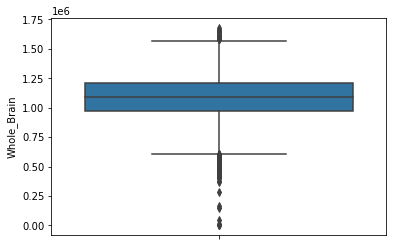

In [35]:
sns.boxplot(data = df, y='Whole_Brain')